In [1]:
import pandas as pd
import numpy as np
import random
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from BirdSTEM.dataset.generate_random_samples import generate_fake_dataset, make_sample_gif


In [4]:
data = generate_fake_dataset()

Positive count:  28884 
Zero count: 137134


<Axes: >

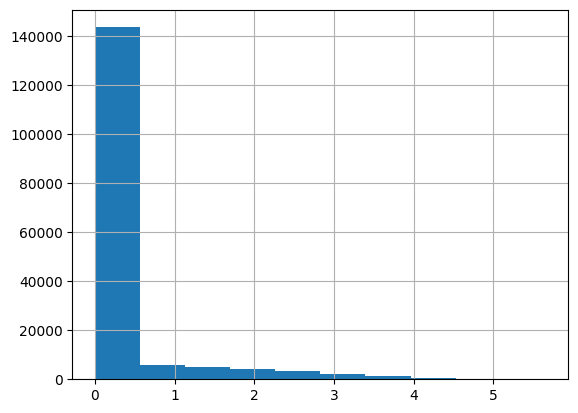

In [5]:
data.abundance.hist(bins=10)

0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x146529820>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x14534c3a0>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x146529280>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callb

46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x145519a60>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x145722040>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x14579e820>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.275.276.277.278.279.280.281.282.283.284.285.286.287.288.289.290.291.292.293.294.295.296.297.298.299.300.301.302.303.304.305.306.307.308.309.310.311.312.313.314.315.316.317.318.319.320.321.322.323.324.325.326.327.328.329.330.331.332.333.334.335.336.337.338.339.340.341.342.343.344.345.346.347.348.349.350.351.352.353.354.355.356.357.358.359.360.361.362.363.364.365.
Finish!


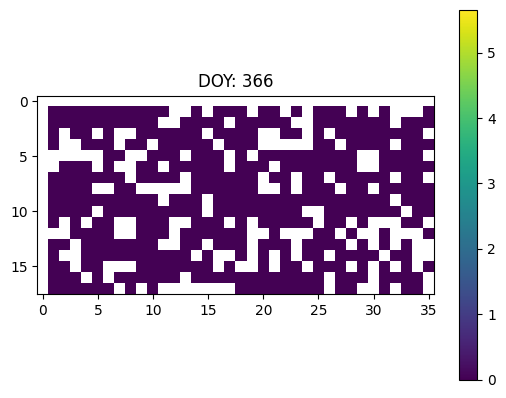

In [6]:
make_sample_gif(data ,'./Sample.gif')


# Test QuadTree

In [7]:
from BirdSTEM.utils.quadtree import QTree, get_ensemble_quadtree, generate_temporal_bins

In [8]:
ensemble_df = get_ensemble_quadtree(data,size=5,
                            grid_len_long_upper_threshold=25, grid_len_long_lower_threshold=5,
                            grid_len_lat_upper_threshold=25, grid_len_lat_lower_threshold=5,
                            points_lower_threshold=50,
                            temporal_start = 1, temporal_end=366, temporal_step=20, 
                            temporal_bin_interval = 50,
                            save_path='./test_ensemble_df.csv')


Generating Ensemble: 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]


Saved! ./test_ensemble_df.csv


# Test model

In [9]:
from BirdSTEM.model.AdaSTEMClassifier import AdaSTEMClassifier
from sklearn.tree import DecisionTreeClassifier


In [10]:
X = data[['sampling_event_identifier','DOY','longitude','latitude','trait1','trait2','trait3']]
y = data[['abundance']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,
                                                    stratify = np.where(y>0, 1, 0), shuffle=True)


In [11]:
base_model = DecisionTreeClassifier(random_state=42)
model = AdaSTEMClassifier(base_model=base_model,
                          ensemble_fold=2,
                          min_ensemble_require= 1,
                          grid_len_long_upper_threshold=50,
                            grid_len_long_lower_threshold=10,
                            grid_len_lat_upper_threshold=50,
                            grid_len_lat_lower_threshold=10,
                            points_lower_threshold=100,
                            temporal_start = 1, temporal_end=366, temporal_step=20, temporal_bin_interval = 50,
                            stixel_training_size_threshold = 10,
                            save_tmp = True,
                            save_dir='./')



In [12]:
model.fit(X_train,y_train)


Generating Ensemble:   0%|          | 0/2 [00:00<?, ?it/s]

Generating Ensemble: 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


Saved! ./ensemble_quadtree_df.csv


training: 100%|██████████| 4640/4640 [00:32<00:00, 144.22it/s]


In [13]:
pred = model.predict_proba(X_test)


predicting ensemble 1 : 100%|██████████| 2387/2387 [00:02<00:00, 840.82it/s]


In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(np.where(y_test.values>0, 1, 0), np.where(pred>0.5, 1, 0))


0.9061450780648197

In [15]:
data['pred_occ'] = model.predict_proba(data[model.x_names + ['sampling_event_identifier','longitude','latitude']])


predicting ensemble 1 : 100%|██████████| 2387/2387 [00:04<00:00, 577.36it/s]


0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.27

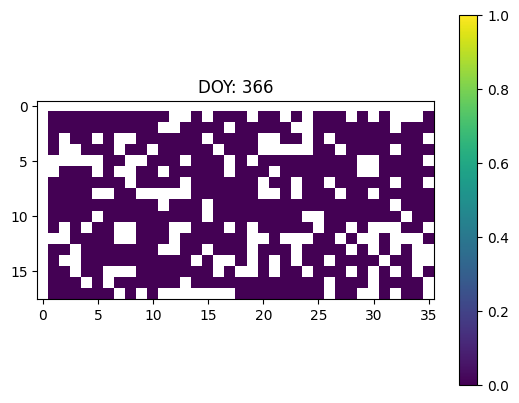

In [16]:
data_origin = data[['sampling_event_identifier','longitude','latitude','DOY','abundance']]
data_origin['abundance'] = np.where(data_origin['abundance']>0, 1, 0)
make_sample_gif(data_origin ,'./Sample_data_origin.gif')


0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.27

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x292aed040>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x293e3b160>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


332.333.334.335.336.337.338.339.340.341.342.343.344.345.346.347.348.349.350.351.352.353.354.355.356.357.358.359.360.361.362.363.364.365.
Finish!


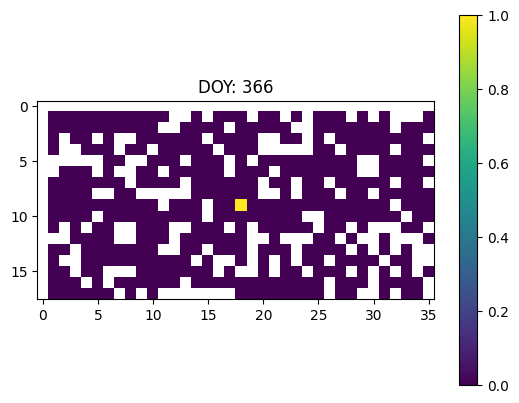

In [17]:
data_pred = data[['sampling_event_identifier','longitude','latitude','DOY','pred_occ']]
data_pred['abundance'] = np.where(data_pred['pred_occ']>0, 1, 0)
del data_pred['pred_occ']

make_sample_gif(data_pred ,'./Sample_data_pred.gif')


# Traditional randomforest & decision tree

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [19]:
baseline_model = DecisionTreeClassifier(random_state=42).fit(X_train[['DOY','trait1','trait2','trait3']], 
                                                             np.where(y_train>0, 1, 0))
baseline_pred = baseline_model.predict(X_test[['DOY','trait1','trait2','trait3']])
roc_auc_score(np.where(y_test>0, 1, 0), baseline_pred)


0.903187860284238